In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from typing import List

In [20]:
def plot_price_with_multiple_adcs(
    price_df,
    adc_dfs: List[pd.DataFrame],
    labels=None,
    price_col="price",
    start=None,
    end=None
):
    """
    Рисует график цены и несколько ADC-графиков, синхронизированных по индексу.

    Args:
        price_df: DataFrame с ценой и индексом = временной оси
        adc_dfs: список DataFrame'ов с колонкой 'adc' и таким же индексом
        labels: список строк для легенды графиков ADC
        price_col: имя колонки цены
        start: индекс начала (временной), например '2022-01-01'
        end: индекс конца
    """
    if labels is None:
        labels = [f"ADC {i}" for i in range(len(adc_dfs))]

    # Ограничиваем по периоду
    price_df = price_df.copy().loc[start:end]
    adc_dfs = [adc.loc[start:end] for adc in adc_dfs]

    # График
    plt.figure(figsize=(14, 10))
    gs = plt.GridSpec(2, 1, height_ratios=[2, 3])

    # Цена
    ax0 = plt.subplot(gs[0])
    ax0.plot(price_df.index, price_df[price_col], label="Price", color="black")
    ax0.set_ylabel("Price")
    ax0.set_title("Price and ADCs with different $w_{max}$")
    ax0.legend()
    ax0.grid(True)

    # ADCs
    ax1 = plt.subplot(gs[1], sharex=ax0)
    for i, adc_df in enumerate(adc_dfs):
        ax1.plot(adc_df.index, adc_df["adc"], label=labels[i])
    ax1.axhline(0, color="red", linestyle="--")
    ax1.set_ylabel("ADC")
    ax1.set_xlabel("Time")
    ax1.legend()
    ax1.grid(True)

    plt.tight_layout()
    plt.show()


In [18]:
def plot_price_and_adcs_separately(
    price_df,
    adc_dfs: List[pd.DataFrame],
    labels=None,
    price_col="price",
    start=None,
    end=None
):
    """
    Рисует цену + каждый ADC-график в отдельном окне.

    Args:
        price_df: DataFrame с колонкой цены и индексом = временной оси
        adc_dfs: список DataFrame'ов с колонкой 'adc' и таким же индексом
        labels: список строк для легенды графиков ADC
        price_col: имя колонки цены
        start: начало временного окна (индекс или строка времени)
        end: конец временного окна
    """
    if labels is None:
        labels = [f"ADC {i}" for i in range(len(adc_dfs))]

    # Ограничим данные по времени
    price_df = price_df.copy().loc[start:end]
    adc_dfs = [adc.loc[start:end] for adc in adc_dfs]

    num_plots = 1 + len(adc_dfs)  # цена + adc
    fig, axes = plt.subplots(num_plots, 1, figsize=(14, 3 * num_plots), sharex=True)

    # Цена
    axes[0].plot(price_df.index, price_df[price_col], color="black")
    axes[0].set_ylabel("Price")
    axes[0].set_title("Price")

    # ADC
    for i, (adc_df, label) in enumerate(zip(adc_dfs, labels)):
        axes[i + 1].plot(adc_df.index, adc_df["adc"], label=label)
        axes[i + 1].axhline(0, color="red", linestyle="--")
        axes[i + 1].set_ylabel("ADC")
        axes[i + 1].set_title(label)
        axes[i + 1].grid(True)

    axes[-1].set_xlabel("Time")
    plt.tight_layout()
    plt.show()

In [12]:
price_df = pd.read_csv("../data/prices/BTC_100ms.csv")
adc100_df = pd.read_csv("../data/adc/BTC_100ms_w100.csv")
adc300_df = pd.read_csv("../data/adc/BTC_100ms_w300.csv")
adc500_df = pd.read_csv("../data/adc/BTC_100ms_w500.csv")
adc1000_df = pd.read_csv("../data/adc/BTC_100ms_w1000.csv")
adc3000_df = pd.read_csv("../data/adc/BTC_100ms_w3000.csv")

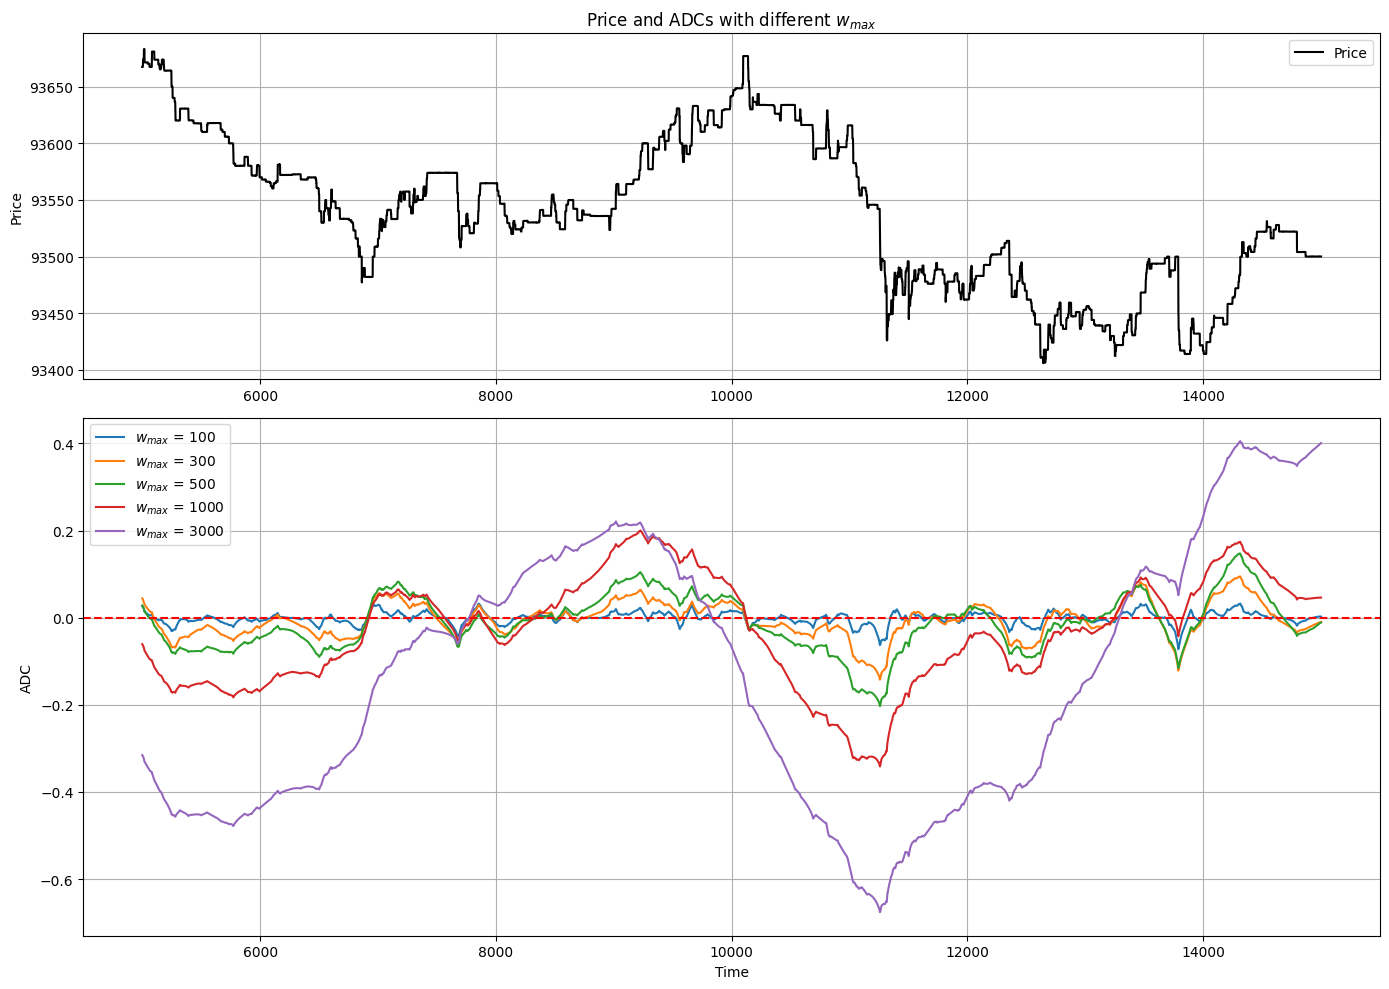

In [25]:
plot_price_with_multiple_adcs(
    price_df=price_df,
    adc_dfs=[adc100_df, adc300_df, adc500_df, adc1000_df, adc3000_df],
    labels=["$w_{max}$ = 100", "$w_{max}$ = 300", "$w_{max}$ = 500", "$w_{max}$ = 1000", "$w_{max}$ = 3000"],
    start=5000, end=15000
)

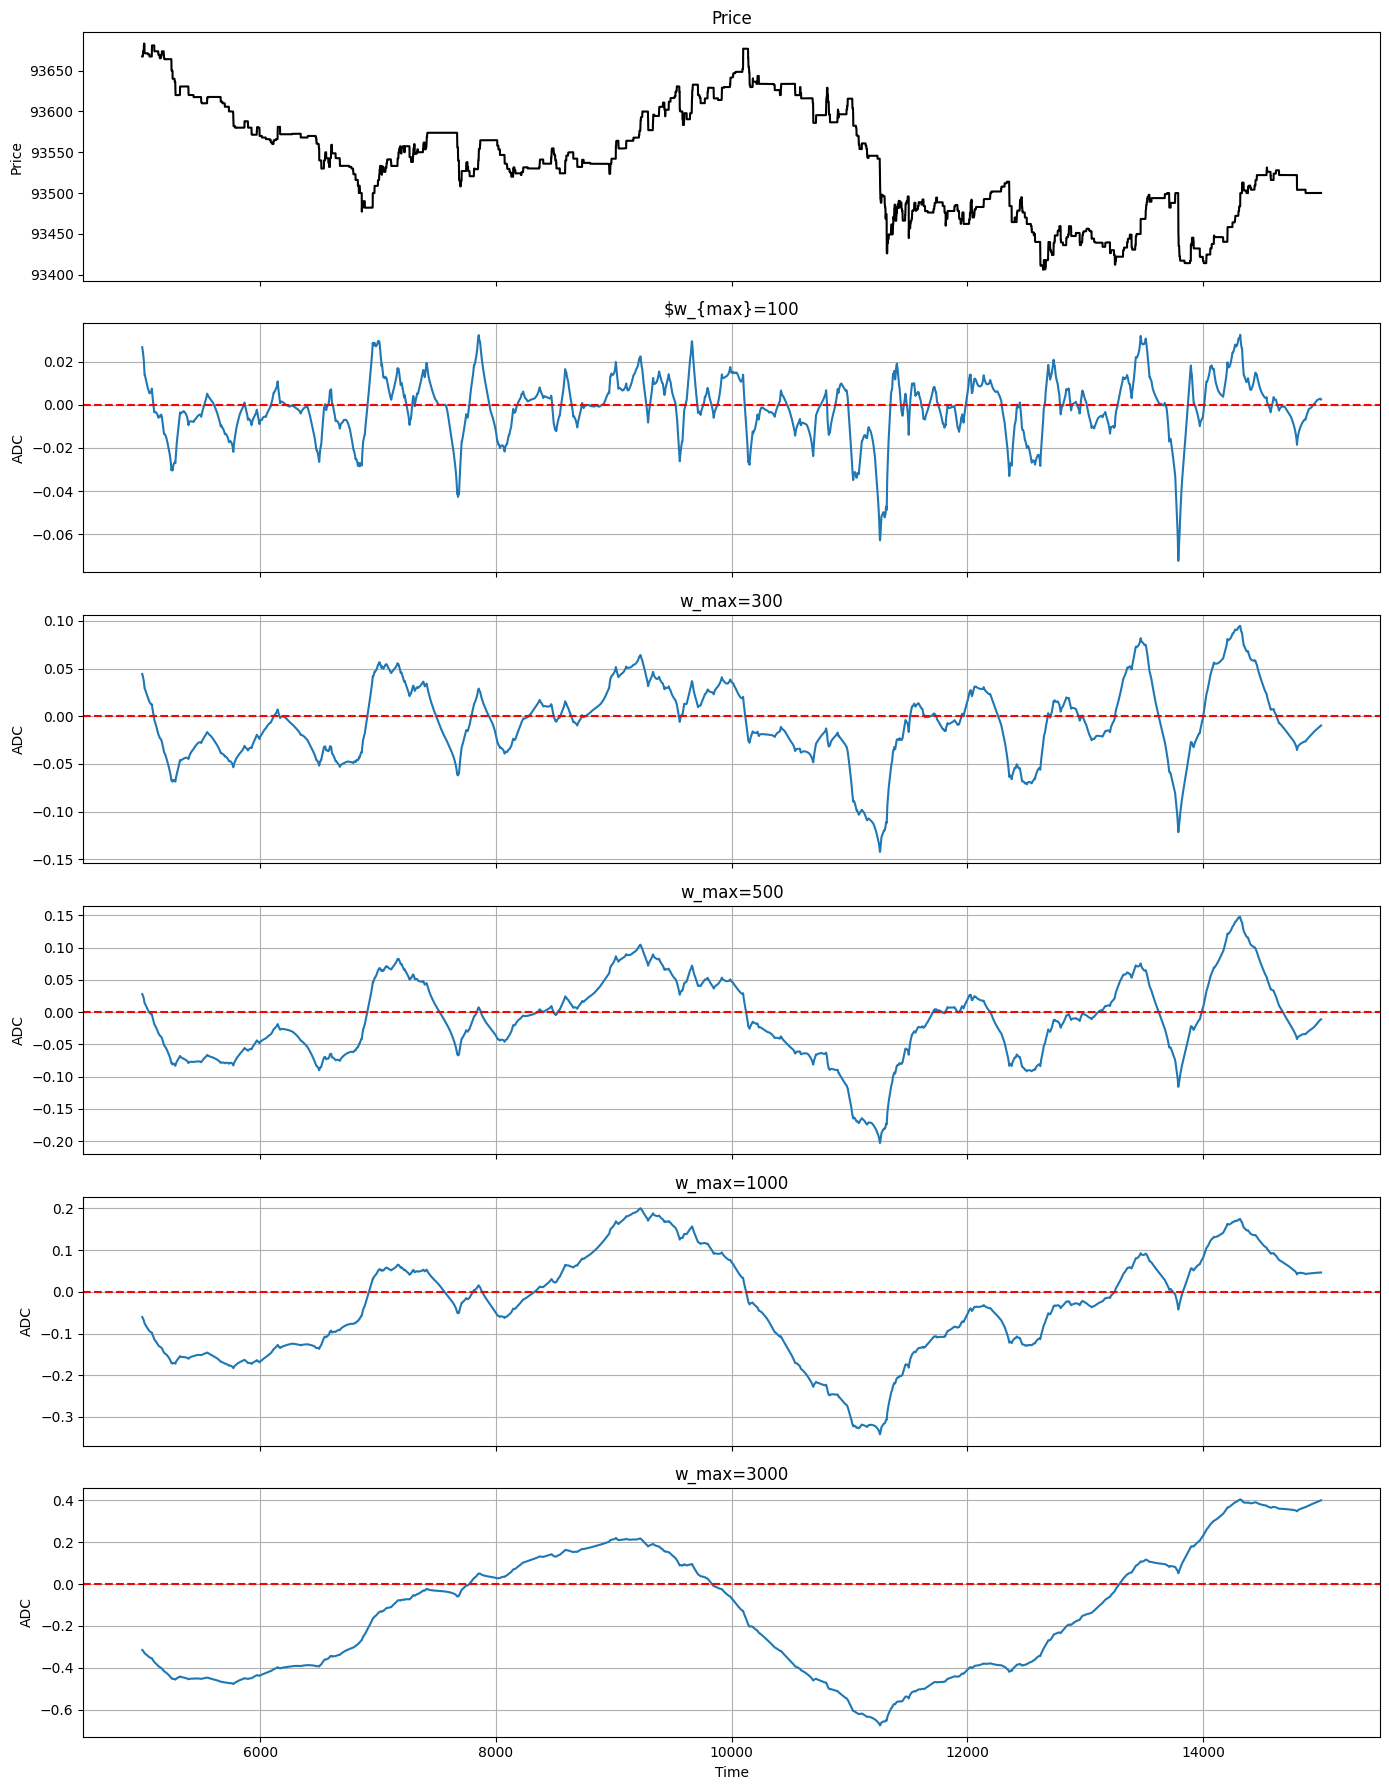

In [19]:
plot_price_and_adcs_separately(
    price_df=price_df,
    adc_dfs=[adc100_df, adc300_df, adc500_df, adc1000_df, adc3000_df],
    labels=["$w_{max}=100", "w_max=300", "w_max=500", "w_max=1000", "w_max=3000"],
    start=5000, end=15000
)